---
title: "Working with tabular data"
subtitle: "Basics in Python"
execute: 
  enabled: false
format:
  revealjs: 
    smaller: true
    scrollable: true
    code-block-height: 650px  
    theme: dark  
    slide-number: true
    code-fold: false
    chalkboard: 
      buttons: false
    preview-links: auto
---

## Importing data

By far the most ubiquitous data format is the “comma-separated values” file format – or simply the csv file format. The csv file format can be used to store a matrix. Here is how:

  1. Each row of the file contains numbers separated by commas. There must be as many entries in a row as matrix columns.

  2. If you start a row with “#” it will be ignored when reading the file.
  
 - In the directory, there is file a named `data.csv`, we can read it using `pandas` library 

 - The data is a thermodynamic table with saturated steam properties. 

## Reading data with `pandas`

In [14]:
#| echo: true
#| output-location: fragment

import pandas as pd
data = pd.read_csv('data.csv', delimiter=',')
data.head(3)


,Absolute Pressure (bar),Boiling Point (oC),Specific Volume (steam) (m3/kg),Density (steam) (kg/m3),Specific Enthalpy of Liquid Water (sensible heat) (kJ/kg),Specific Enthalpy of Liquid Water (sensible heat) (kcal/kg),Specific Enthalpy of Steam (total heat) (kJ/kg),Specific Enthalpy of Steam (total heat) (kcal/kg),Latent heat of Vaporization (kJ/kg),Latent heat of Vaporization (kcal/kg),Specific Heat (kJ/kg K)
0,0.02,17.51,67.006,0.015,73.45,17.54,2533.64,605.15,2460.19,587.61,1.8644
1,0.03,24.10,45.667,0.022,101.00,24.12,2545.64,608.02,2444.65,583.89,1.8694
2,0.04,28.98,34.802,0.029,121.41,29.00,2554.51,610.13,2433.10,581.14,1.8736


# Exploratory Analysis

## Exploratory Analysis

::: panel-tabset

### Counting missing data

 - The first thing to check in a tabulated data set is if there's missing data.
 - That will indicate either a problem in the data set reading or just say that these records were actually missing!

In [15]:
#| echo: true
#| output-location: fragment
data.isna().sum()

Absolute Pressure (bar)                                        0
Boiling Point (oC)                                             0
Specific Volume (steam) (m3/kg)                                1
Density (steam) (kg/m3)                                        1
Specific Enthalpy of Liquid Water (sensible heat) (kJ/kg)      1
Specific Enthalpy of Liquid Water (sensible heat) (kcal/kg)    1
Specific Enthalpy of Steam (total heat) (kJ/kg)                1
Specific Enthalpy of Steam (total heat) (kcal/kg)              1
Latent heat of Vaporization (kJ/kg)                            1
Latent heat of Vaporization (kcal/kg)                          1
Specific Heat (kJ/kg K)                                        2
dtype: int64

### Summary Statistics

 - When data is missing, pandas will remove the any lines with missing information when you try to calculate anything.

In [16]:
#| echo: true
#| output-location: fragment
summary = data.describe()
summary

,Absolute Pressure (bar),Boiling Point (oC),Specific Volume (steam) (m3/kg),Density (steam) (kg/m3),Specific Enthalpy of Liquid Water (sensible heat) (kJ/kg),Specific Enthalpy of Liquid Water (sensible heat) (kcal/kg),Specific Enthalpy of Steam (total heat) (kJ/kg),Specific Enthalpy of Steam (total heat) (kcal/kg),Latent heat of Vaporization (kJ/kg),Latent heat of Vaporization (kcal/kg),Specific Heat (kJ/kg K)
count,68.000000,68.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,66.000000
mean,9.043235,137.210809,4.850761,14.638075,582.540149,179.799851,2684.580896,669.525970,2102.041791,500.351478,2.402277
std,12.242958,64.173370,11.654880,86.272061,273.605471,326.961574,263.145056,172.922353,277.318156,76.958146,0.476031
min,0.020000,0.255000,0.067000,0.015000,73.450000,17.540000,660.370000,605.150000,490.960000,2.469000,1.864400
25%,0.975000,95.910000,0.146000,0.562500,398.470000,98.250000,2668.310000,638.470000,1951.485000,466.105000,2.018375
50%,3.750000,136.205000,0.606000,1.908000,561.440000,139.550000,2724.660000,652.440000,2147.350000,512.890000,2.215600
75%,14.250000,192.460000,1.978000,7.351000,822.365000,200.000000,2786.605000,666.100000,2261.785000,540.220000,2.765700
max,76.000000,233.840000,67.006000,709.300000,1008.330000,2764.840000,2802.270000,2055.530000,2460.190000,587.610000,3.406900


:::

## Exploratory Analysis 

### Actively handling missing data

 - `pandas` can handle automatically missing data if you do calculations in it.
 - However, if you want to do calculations using another package, errors will appear as they might not handle missing values like `pandas`

## Exploratory Analysis

### Actively handling missing data - Code

In [17]:
#| echo: true
data_no_null_rows = data.dropna(axis = 0)

#Dropna drops all rows that contain at least 1 missing value

In [18]:
#| echo: true
#| output-location: fragment
data_no_null_rows.isna().sum()

Absolute Pressure (bar)                                        0
Boiling Point (oC)                                             0
Specific Volume (steam) (m3/kg)                                0
Density (steam) (kg/m3)                                        0
Specific Enthalpy of Liquid Water (sensible heat) (kJ/kg)      0
Specific Enthalpy of Liquid Water (sensible heat) (kcal/kg)    0
Specific Enthalpy of Steam (total heat) (kJ/kg)                0
Specific Enthalpy of Steam (total heat) (kcal/kg)              0
Latent heat of Vaporization (kJ/kg)                            0
Latent heat of Vaporization (kcal/kg)                          0
Specific Heat (kJ/kg K)                                        0
dtype: int64

### 

::: {style="text-align: center; margin-top: 1em"}
[More options in dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html){preview-link="true" style="text-align: center"}
:::

## Manipulating Data Frames

Given our clean data frame `data_no_null_rows`, we may be interested in answering some questions with it:

 1. How many rows and columns my dataframe has?
 2. How many data points I have for a temperature above 80 degrees celsius and less than 120?
 3. What is the temperature and pressure of the record at 75% of the data set size?


## Manipulating Data Frames

::: panel-tabset

### Question 1

 - How many rows and columns my dataframe has?

In [19]:
#| echo: true
#| output-location: fragment
data_no_null_rows.shape

(66, 11)

### Question 2

 - How many data points I have for a temperature above 80 degrees celsius and less than 120?

In [20]:
#| echo: true
#| output-location: fragment
#| code-line-numbers: "|1|2|3"
above_80 = data_no_null_rows["Boiling Point (oC)"] > 80.0
below_120 = data_no_null_rows["Boiling Point (oC)"] < 120.0
below_120.head(3)

0    True
1    True
2    True
Name: Boiling Point (oC), dtype: bool

In [21]:
#| echo: true
#| output-location: fragment
a80_b120 = above_80 & below_120
data_no_null_rows[a80_b120].shape

(15, 11)

### Question 3

 - What is the temperature and pressure of the record at 75% of the data set size?

In [22]:
#| echo: true
#| output-location: fragment
#| code-line-numbers: "|1|2"
idx_75 = int(data_no_null_rows.shape[0]*.75)
data_no_null_rows.loc[idx_75, ["Boiling Point (oC)", "Absolute Pressure (bar)"]]

Boiling Point (oC)         187.96
Absolute Pressure (bar)     12.00
Name: 49, dtype: float64

:::

## Data visualization

Python has many visualization libraries. Here are some popular ones for data science:

 - [Matplotlib](https://matplotlib.org/)
 - [seaborn](https://seaborn.pydata.org/)
 - [plotly](https://plotly.com/python/)

## Data Visualization

::: panel-tabset

### 2D - scatterplots

<Axes: xlabel='Boiling Point (oC)', ylabel='Absolute Pressure (bar)'>

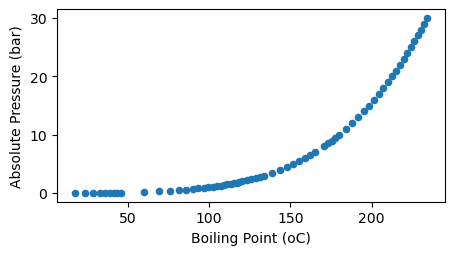

In [23]:
#| echo: true
#| output-location: fragment
#| label: T-P
#| fig-width: 8
#| fig-height: 2.5
#| fig-cap: "Temperature vs Pressure - Satured Steam"
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5.0, 2.5)
data_no_null_rows.plot(x = "Boiling Point (oC)", y = "Absolute Pressure (bar)", kind = "scatter")

 - You can also plot without using `pandas`

Text(0, 0.5, 'Absolute Pressure (bar)')

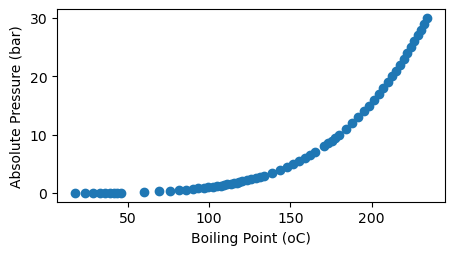

In [24]:
#| echo: true
#| output-location: fragment
#| code-line-numbers: "|1|2|3"
plt.scatter(data_no_null_rows["Boiling Point (oC)"], data_no_null_rows["Absolute Pressure (bar)"])
plt.xlabel("Boiling Point (oC)")
plt.ylabel("Absolute Pressure (bar)")

### 2D - histograms

array([[<Axes: title={'center': 'Boiling Point (oC)'}>,
        <Axes: title={'center': 'Absolute Pressure (bar)'}>]],
      dtype=object)

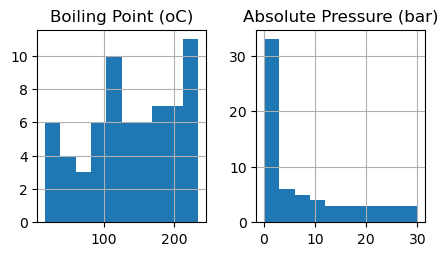

In [25]:
#| echo: true
#| output-location: fragment
#| label: histogram
#| fig-width: 8
#| fig-height: 2.5
#| fig-cap: "Histograms"
data_no_null_rows.hist(["Boiling Point (oC)", "Absolute Pressure (bar)"])

### 2D - Box plot

<Axes: >

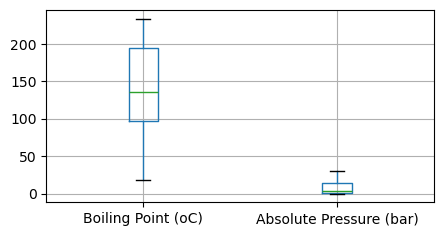

In [26]:
#| echo: true
#| output-location: fragment
#| label: boxplot
#| fig-width: 8
#| fig-height: 2.5
#| fig-cap: "Boxplot"
data_no_null_rows.boxplot(["Boiling Point (oC)", "Absolute Pressure (bar)"])

:::